# Машинне навчання
# Лабораторна робота №6
# Вишотравка Діана СА-33
## Варіант 4

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sp
from scipy.stats import uniform
from sklearn.preprocessing import TargetEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import  LocallyLinearEmbedding,  SpectralEmbedding
from sklearn_pandas import DataFrameMapper, gen_features
from eds import *


import warnings
warnings.filterwarnings('ignore')

sns.set_theme(rc={'figure.figsize': (15 , 10.5 ),
                  "lines.linewidth": 2.5}, font_scale=1.5)
palette = ['#2f6142','#69e0ab', '#80e0dc', '#0ca69f', '#046091', '#877ff0', '#6a4280', '#f5a6e1', '#7a1160']
sns.set_palette(palette)

In [3]:
df = pd.read_csv('diabetes_data.csv')

## EDA

In [4]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [6]:
print(f'Number of duplicate entries: {df.duplicated().sum()}')
print(f'Number missing: {sum(df.isna().sum())}')
print(f'Number of duplicate entries for certain columns:\n{df[df.duplicated()].index}')
df[df.duplicated()]

Number of duplicate entries: 6672
Number missing: 0
Number of duplicate entries for certain columns:
Index([  360,   397,   436,   514,   525,   602,   689,   811,   891,   938,
       ...
       70465, 70481, 70546, 70571, 70580, 70591, 70621, 70640, 70642, 70663],
      dtype='int64', length=6672)


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
360,6.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
397,8.0,0.0,0.0,1.0,29.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
436,8.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
514,9.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
525,7.0,0.0,0.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70591,10.0,1.0,1.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
70621,10.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
70640,6.0,1.0,0.0,1.0,37.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
70642,10.0,0.0,1.0,1.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(64020, 18)

In [8]:
numerical = ['BMI']
categorical = ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP']
target = 'Diabetes'

## Data Splitting

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, [i != 'Diabetes' for i in df.columns.to_list()]], df.loc[:, ['Diabetes']], test_size=0.2, random_state=24)

## Preprocessing

In [10]:
mapper = DataFrameMapper(
    gen_features(
        columns=[[i] for i in categorical],
        classes=[TargetEncoder, StandardScaler]
    )+ gen_features(
        columns=[[i] for i in numerical],
        classes=[StandardScaler] 
    ),
    default=None,
    df_out= True
)
mapper.fit(x_train, y_train)

DataFrameMapper(default=None, df_out=True, drop_cols=[],
                features=[(['Age'], [TargetEncoder(), StandardScaler()], {}),
                          (['Sex'], [TargetEncoder(), StandardScaler()], {}),
                          (['HighChol'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['CholCheck'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['Smoker'], [TargetEncoder(), StandardScaler()], {}),
                          (['HeartDiseaseorAttack'],
                           [Targe...
                           [TargetEncoder(), StandardScaler()], {}),
                          (['GenHlth'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['MentHlth'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['PhysHlth'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['DiffWalk'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['Stroke'], [TargetEncoder(), StandardScaler()], {}),
                          (['HighBP'], [TargetEncoder(), StandardScaler()], {}),
                          (['BMI'], [StandardScaler()], {})])

## PCA

In [11]:
pca_model = PCA()
pca_model.fit_transform(mapper.transform(x_train))

array([[-0.99315508, -0.5960093 ,  1.37439747, ...,  1.42116303,
        -0.2989232 ,  0.13656426],
       [ 1.18182307,  1.59632195, -2.18792487, ...,  0.55850622,
        -0.3969975 ,  0.06772636],
       [ 1.74000346,  2.31871755, -0.88098947, ..., -0.67011096,
         0.72509925, -1.44701735],
       ...,
       [-2.36439229, -0.44848882, -1.33512883, ...,  1.22659962,
        -0.06829624,  0.48008492],
       [-2.83396269,  0.53545603, -1.42159878, ...,  0.30288939,
         0.62016783,  0.39354042],
       [-1.20757812, -1.28686992, -0.32814857, ...,  0.20352982,
         0.06657508,  0.20577786]])

### Explained variance analysis

In [12]:
explained_variance=pca_model.explained_variance_ratio_
cumulative_explained = np.cumsum(explained_variance)

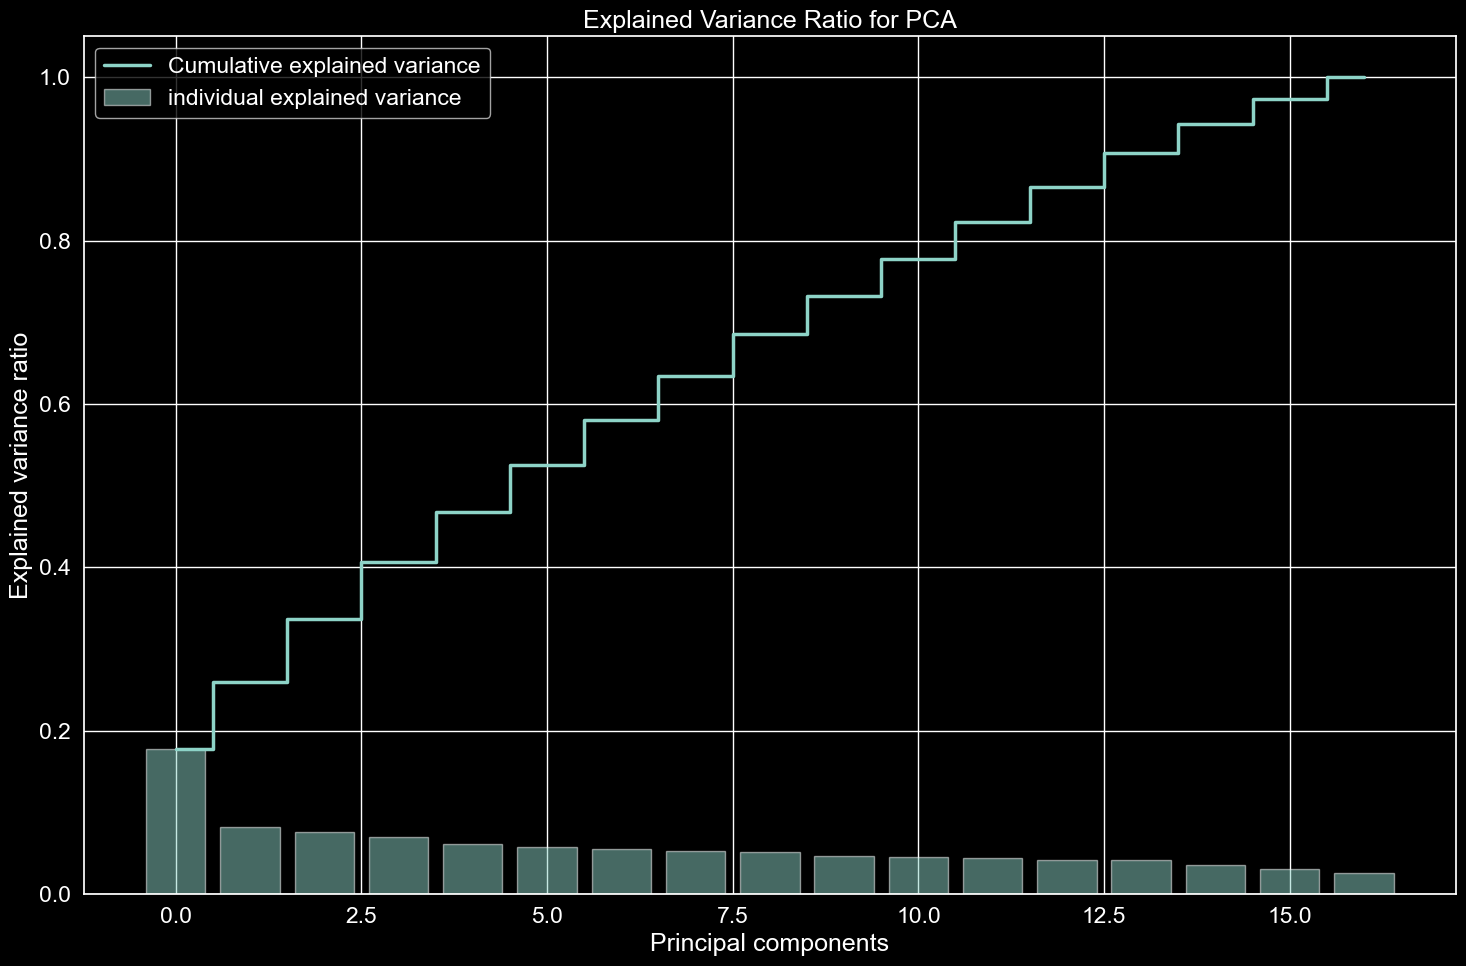

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15, 10))

    plt.bar(range(17), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(cumulative_explained)), cumulative_explained, where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Explained Variance Ratio for PCA')
    plt.tight_layout()
    plt.show()

In [14]:
pca2 = pca_model.transform(mapper.transform(x_train))[:, :2]

In [15]:
pca2

array([[-0.99315508, -0.5960093 ],
       [ 1.18182307,  1.59632195],
       [ 1.74000346,  2.31871755],
       ...,
       [-2.36439229, -0.44848882],
       [-2.83396269,  0.53545603],
       [-1.20757812, -1.28686992]])

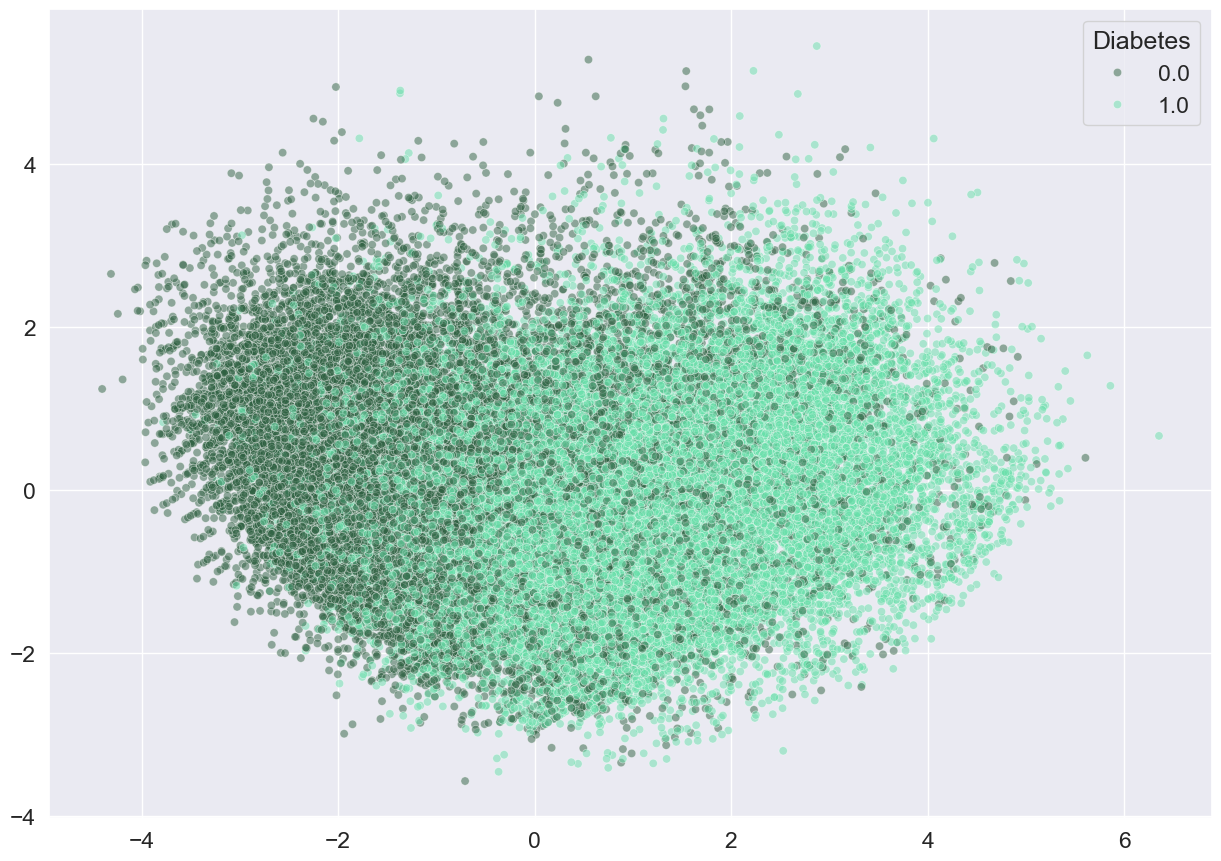

In [24]:
sns.scatterplot(x = pca2[:, 0], y = pca2[:, 1], hue=y_train[target], alpha=.5)
plt.show()

## Spectral Embending

In [17]:
x_train_transformed = mapper.transform(x_train)
for i in x_train_transformed.columns:
    x_train_transformed[i] = x_train_transformed[i].astype("float32")

In [18]:
spec_x, _, spec_y, __ = train_test_split(x_train_transformed, y_train, train_size= .1)

In [19]:
spec_transformed = SpectralEmbedding(n_jobs=-1).fit_transform(spec_x)

In [52]:
spec_transformed_less = SpectralEmbedding(n_jobs=-1, n_neighbors=5).fit_transform(spec_x)

In [51]:
spec_transformed_more = SpectralEmbedding(n_jobs=-1, n_neighbors=800).fit_transform(spec_x)

In [36]:
spec_x.shape

(5121, 17)

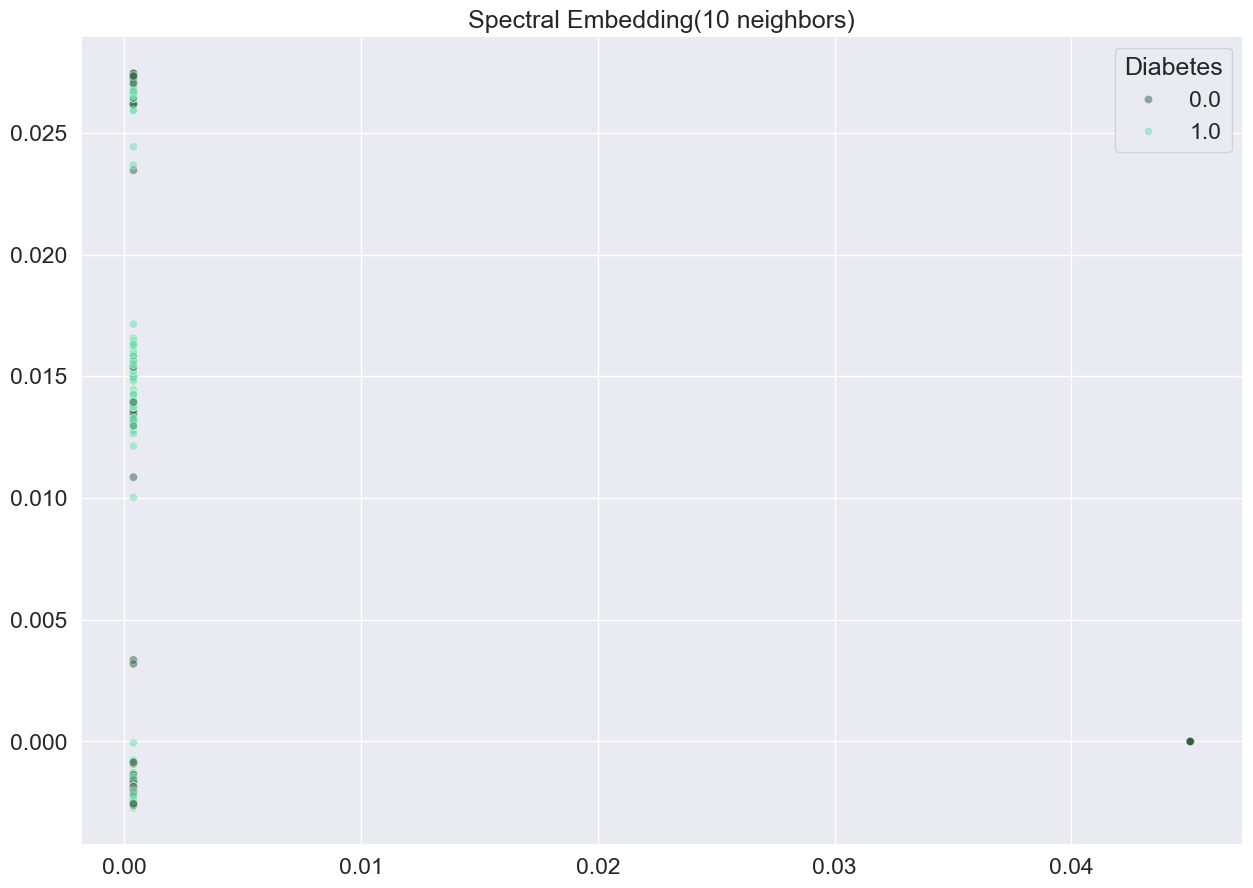

In [55]:
sns.scatterplot(x = spec_transformed_less[:, 0], y = spec_transformed_less[:, 1], hue=spec_y[target], alpha=.5)
plt.title('Spectral Embedding(10 neighbors)')
plt.show()

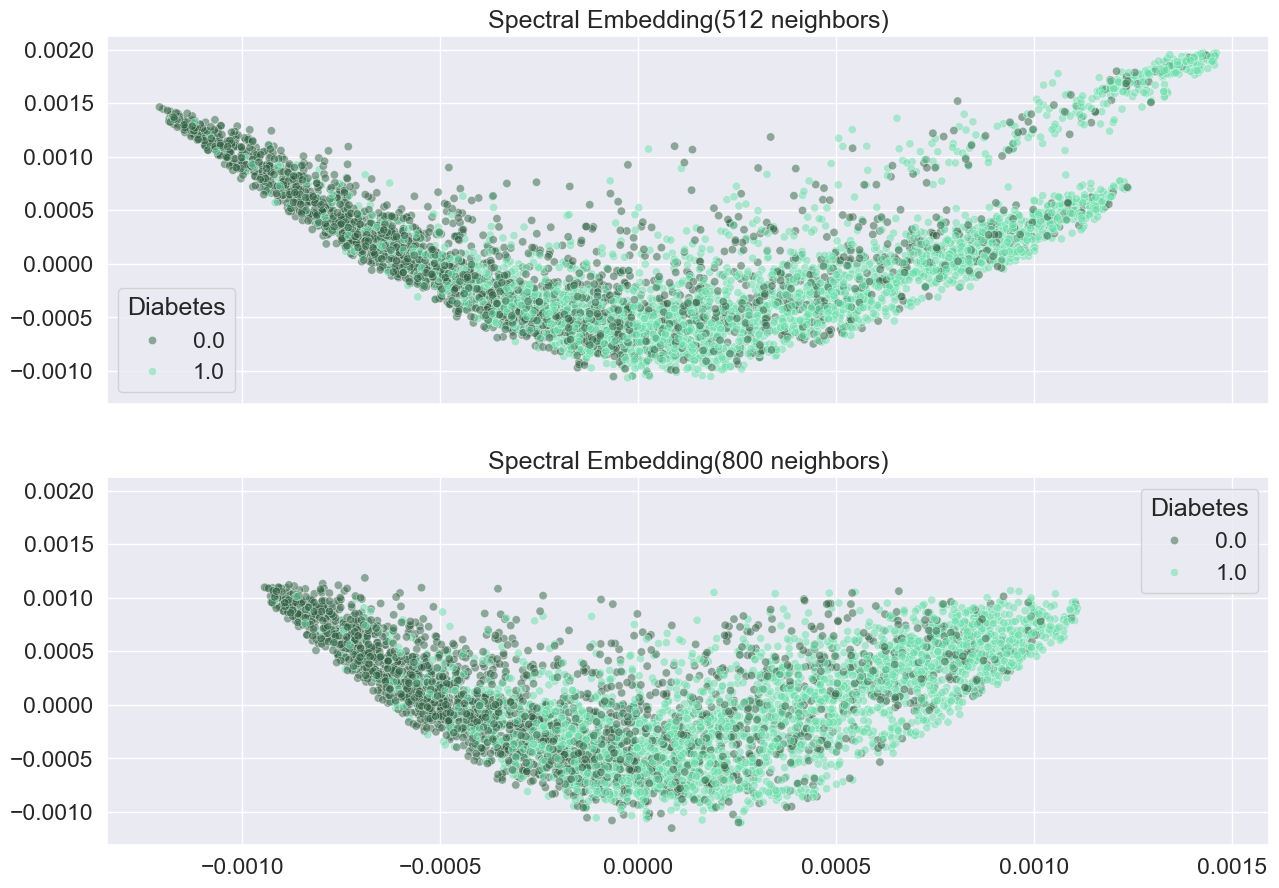

In [54]:
fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True)

sns.scatterplot(x = spec_transformed[:, 0], y = spec_transformed[:, 1], hue=spec_y[target], alpha=.5, ax=axs[0])
sns.scatterplot(x = spec_transformed_more[:, 0], y = spec_transformed_more[:, 1], hue=spec_y[target], alpha=.5, ax=axs[1])
axs[0].set_title('Spectral Embedding(512 neighbors)')
axs[1].set_title('Spectral Embedding(800 neighbors)')
plt.show()

## LocallyLinearEmbedding

In [66]:
lle_transformed = LocallyLinearEmbedding(n_jobs = -1, n_components=2).fit_transform(mapper.transform(spec_x))

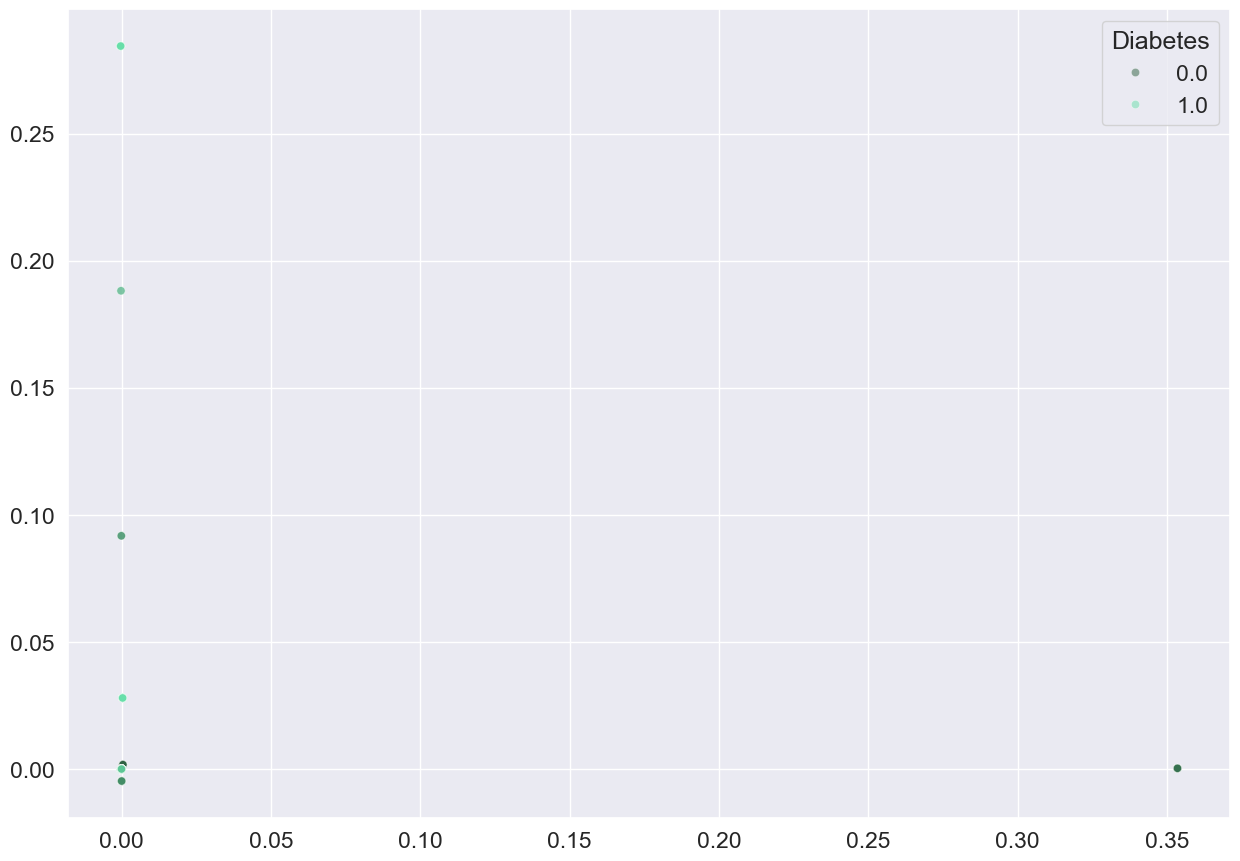

In [67]:
sns.scatterplot(x = lle_transformed[:, 0], y = lle_transformed[:, 1], hue=spec_y[target], alpha=.5)
plt.show()

In [68]:
lle_transformed_medium = LocallyLinearEmbedding(n_jobs = -1, n_components=2, n_neighbors=500).fit_transform(mapper.transform(spec_x))

In [69]:
lle_transformed_more = LocallyLinearEmbedding(n_jobs = -1, n_components=2, n_neighbors=1000).fit_transform(mapper.transform(spec_x))

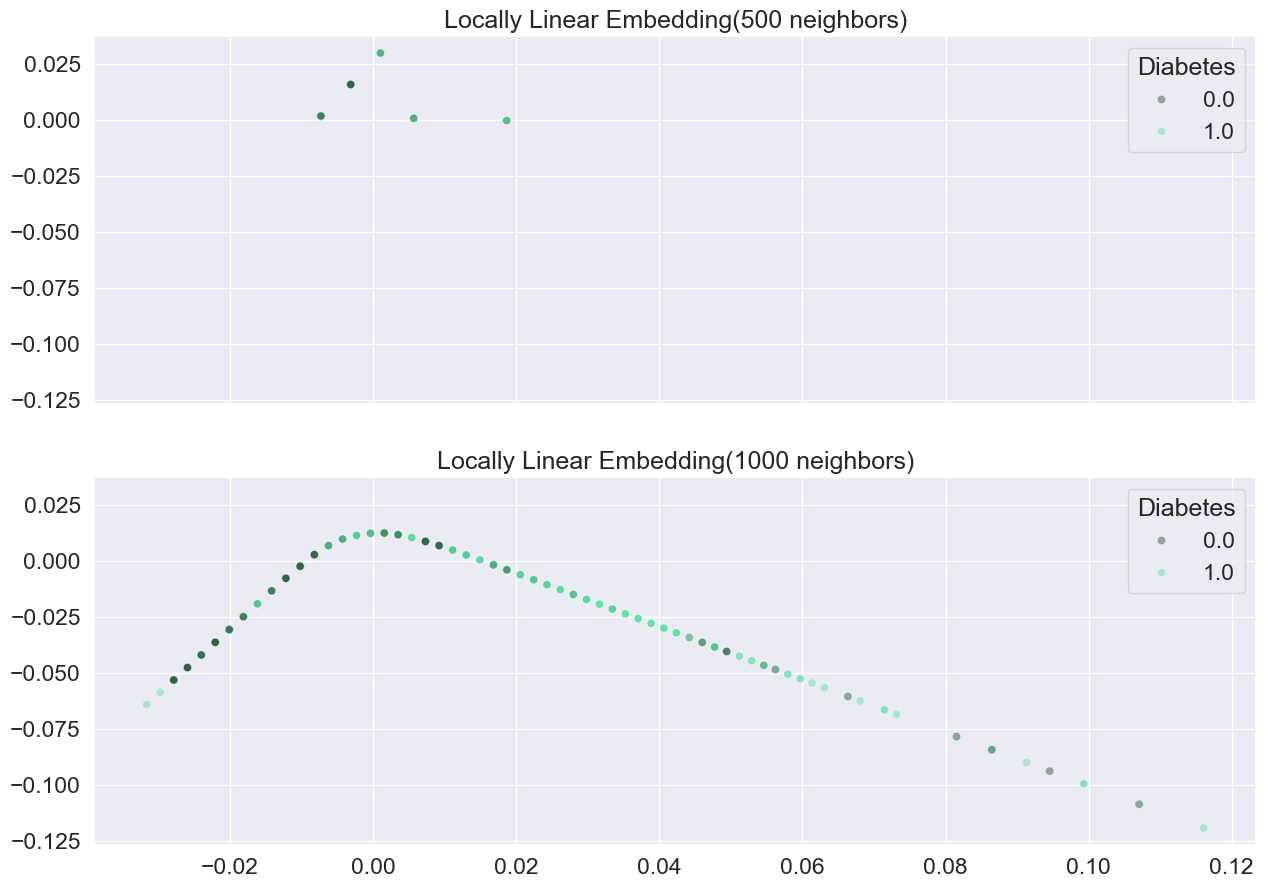

In [135]:
fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True)

sns.scatterplot(x = lle_transformed_medium[:, 0], y = lle_transformed_medium[:, 1], hue=spec_y[target], alpha=.5, ax=axs[0])
sns.scatterplot(x = lle_transformed_more[:, 0], y = lle_transformed_more[:, 1], hue=spec_y[target], alpha=.5, ax=axs[1])
axs[0].set_title('Locally Linear Embedding(500 neighbors)')
axs[1].set_title('Locally Linear Embedding(1000 neighbors)')
plt.show()

 ## Logistic Regression

In [72]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(df.loc[:, [i != 'Diabetes' for i in df.columns.to_list()]], df.loc[:, ['Diabetes']], test_size=0.2, random_state=113131313)

In [73]:
mapper.fit(x_train_log, y_train_log)

DataFrameMapper(default=None, df_out=True, drop_cols=[],
                features=[(['Age'], [TargetEncoder(), StandardScaler()], {}),
                          (['Sex'], [TargetEncoder(), StandardScaler()], {}),
                          (['HighChol'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['CholCheck'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['Smoker'], [TargetEncoder(), StandardScaler()], {}),
                          (['HeartDiseaseorAttack'],
                           [Targe...
                           [TargetEncoder(), StandardScaler()], {}),
                          (['GenHlth'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['MentHlth'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['PhysHlth'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['DiffWalk'], [TargetEncoder(), StandardScaler()],
                           {}),
                          (['Stroke'], [TargetEncoder(), StandardScaler()], {}),
                          (['HighBP'], [TargetEncoder(), StandardScaler()], {}),
                          (['BMI'], [StandardScaler()], {})])

In [76]:
x_train_log_mapped, x_log_test_mapped = mapper.transform(x_train_log), mapper.transform(x_test_log)

### Tuned components of pipeline

In [84]:
pca_temp = PCA()
disctribution = dict(
    n_components = [i for i in range(2,18)]
)
pca_selector = RandomizedSearchCV(pca_temp, disctribution, random_state=42, cv=5, n_iter=100, n_jobs=-1)
pca = pca_selector.fit(x_train_log_mapped).best_estimator_
x_train_log_transformed = pca.fit_transform(x_train_log_mapped)

In [90]:
template_log_model = LogisticRegression(max_iter=1000, verbose=1, dual=False)
distributions = dict(C = uniform(loc=0, scale=5),penalty=['l2', 'l1'])
selector = RandomizedSearchCV(template_log_model, distributions, random_state=42, cv=5, n_iter=100, verbose=1)
log_model = selector.fit(x_train_log_transformed, y_train).best_estimator_
log_model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


LogisticRegression(C=0.027610585618011996, max_iter=1000, verbose=1)

In [92]:
pipeline = Pipeline([
    ('mapper', mapper),                          
    ('pca', pca),                                
    ('classifier', log_model)                     
])

In [93]:
pipeline.fit(x_train_log, y_train_log)

Pipeline(steps=[('mapper',
                 DataFrameMapper(default=None, df_out=True, drop_cols=[],
                                 features=[(['Age'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['Sex'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['HighChol'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['CholCheck'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['Smoker'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['Hea...
                                           (['PhysHlth'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['DiffWalk'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['Stroke'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['HighBP'],
                                            [TargetEncoder(), StandardScaler()],
                                            {}),
                                           (['BMI'], [StandardScaler()], {})])),
                ('pca', PCA(n_components=16)),
                ('classifier',
                 LogisticRegression(C=0.027610585618011996, max_iter=1000,
                                    verbose=1))])

In [96]:
print(classification_report(y_test, pipeline.predict(x_test_log)))

              precision    recall  f1-score   support

         0.0       0.49      0.45      0.47      6186
         1.0       0.52      0.56      0.54      6618

    accuracy                           0.51     12804
   macro avg       0.51      0.51      0.50     12804
weighted avg       0.51      0.51      0.51     12804



### Tuned pipeline

In [102]:
pipe = Pipeline([
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

In [109]:
distribution = {
    'pca__n_components': [i for i in range(2, 18)],
    'classifier__C': uniform(loc=0, scale=5),
    'classifier__penalty':['l2', 'l1']
}

selector = RandomizedSearchCV(pipe, distribution, random_state=42, cv=5, n_iter=100, n_jobs=-1)
model = selector.fit(x_train_log_mapped, y_train_log).best_estimator_

In [111]:
print(classification_report(y_test_log, model.predict(mapper.transform(x_test_log))))

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      6126
         1.0       0.73      0.78      0.75      6678

    accuracy                           0.73     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



## Results

In [123]:
report = pd.concat((pd.DataFrame({
    'Accuracy': accuracy_score(y_test_log, model.predict(mapper.transform(x_test_log))),
    'Precision': precision_recall_fscore_support(y_test_log, model.predict(mapper.transform(x_test_log)), average = 'macro')[0],
    'Recall': precision_recall_fscore_support(y_test_log, model.predict(mapper.transform(x_test_log)), average = 'macro')[1],
    'F1': precision_recall_fscore_support(y_test_log, model.predict(mapper.transform(x_test_log)), average = 'macro')[2]
}, index=['PCA model']),
pd.DataFrame({
    'Accuracy': 0.737035,
    'Precision': 0.7379123435968606,
    'Recall': 0.7348623647341146,
    'F1': 0.7352514954834047,
}, index=['Without PCA Model']))).T
report

,PCA model,Without PCA Model
Accuracy,0.734067,0.737035
Precision,0.734834,0.737912
Recall,0.731929,0.734862
F1,0.732305,0.735251
